# Exploratory Data Analysis on Steam Game Dataset
### Fall 2020
#### Brent Min (A15053745), Jack Lin (A15105479)
#### DSC180A - A06

Abstract:  
      In this Result Replication project, the aim is th observe how well the baseline models defined in the paper "Are We Really Making Much Progress?" perform in comparision to another recommender system: SASRec. The SASRec paper outputted metrics on four datasets: Amazon Beauty Products, Amazon Videos, Steam Games, and the MovieLens Dataset. We will be using the Steam Dataset, which is a User Content Matrix (UCM) that ontains games played by Users, to see how well the baseline models perform on it.

## 0. Imports

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display_html
import ast

In [15]:
path = './data/Steam.txt'
data = pd.read_csv(path, sep=" ", header=None)
data.columns = ['user', 'game']

In [78]:
# Display Dataframes Side by Side
# Source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

## 1. Overview of Users, Games

In [57]:
data.head()

,user,game
0,1,12179
1,1,4675
2,1,11374
3,1,1807
4,1,8919


In [89]:
# Number of Games Played Per User
numGames_user = data.groupby('user').count().sort_values('game', ascending=False)
numGames_user.columns = ['# of Games Played']
# Number of Plays per Game
gamesFreq = data.groupby('game').count().sort_values('user', ascending=False)
gamesFreq.columns = ['Gameplay Count']

# Display Top 5, Descending Order
display_side_by_side(numGames_user.head(10), gamesFreq.head(10))

,# of Games Played
user,
18,1231
24,1084
1864,881
2352,871
1923,864
9971,811
463,805
222,763
1729,738


### 1.1 Summary Statistics

In [84]:
# Summary Statistics for Games Played By Users 
userFreq_stats = pd.DataFrame(numGames_user.describe())
userFreq_stats.columns = ['count']

# Summary Statistics Of Gameplay Count
gamesFreq_stats = pd.DataFrame(gamesFreq.describe())
gamesFreq_stats.columns = ['count']

# Display Summary Statistics
print('Summary Statistics for Games Played By Users')
display(userFreq_stats)
print('\nSummary Statistics Of Gameplay Count')
display(gamesFreq_stats)

Summary Statistics for Games Played By Users


,count
count,334730.000000
mean,11.012374
std,18.311805
min,1.000000
25%,5.000000
50%,7.000000
75%,11.000000
max,1231.000000



Summary Statistics Of Gameplay Count


,count
count,13047.000000
mean,282.530237
std,1050.301474
min,1.000000
25%,11.000000
50%,33.000000
75%,139.000000
max,37500.000000


### 1.2 Boxplot Distributions of User's Gameplays, Game Frequency

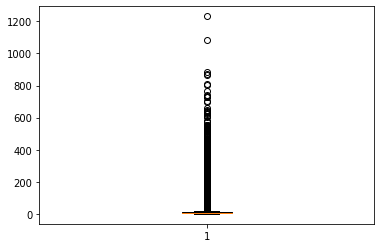

In [158]:
# Box Plot of Games by Games Per User
plt.boxplot(numGames_user.iloc[:,0]);

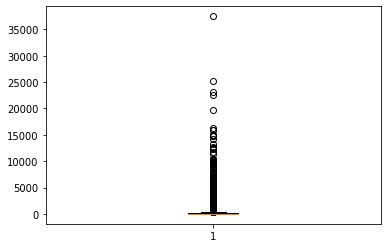

In [111]:
# Box Plot of Games by Gameplay Count
plt.boxplot(gamesFreq.iloc[:,0]);

## 2. Overview of Raw Data

Note: The following four cells uses raw data (in JSON form) that can be found at:  
http://cseweb.ucsd.edu/~wckang/steam_games.json.gz  
http://cseweb.ucsd.edu/~wckang/steam_reviews.json.gz  
These datasets were not included due to their large size. The files have been processed and left with relevant fields.

games = []
with open('./steam_games.json') as f:
    for line in f:
        games.append(dict(ast.literal_eval(line)))
games = pd.DataFrame(games)

In [157]:
games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


reviews = []
with open('./steam_reviews.json') as f:
    for line in f:
        reviews.append(dict(ast.literal_eval(line)))
reviews = pd.DataFrame(reviews)

In [156]:
reviews.head()

,username,hours,products,product_id,page_order,date,text,early_access,page,found_funny,compensation,user_id
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,₮ʜᴇ Wᴀʀᴛᴏɴ,51.1,769.0,328100,0,2017-12-27,looks like a facebook game,False,1,NaN,NaN,NaN
2,hello?<,14.6,2.0,328100,1,2017-10-16,Better than Minecraft,False,1,2.0,Product received for free,NaN
3,Cyderine916,5.0,64.0,35140,0,2018-01-04,I love and idolized Batman and this game is Ma...,False,1,NaN,NaN,NaN
4,DarklyThinking,16.6,577.0,35140,1,2018-01-04,Still worth playing in 2018.\nProbably my favo...,False,1,NaN,NaN,76561198007483075


In [160]:
games_review_count = reviews.product_id.value_counts()
games_review_count = games_review_count[:10].reset_index()
games_review_count.columns = ['id', 'count']
top_by_review_count = games_review_count.merge(games, how='left')[['id', 'count', 'title']]

Write out processed file to csv

top_by_review_count.to_csv('./../src/popular_game_by_review.csv')

Read In File

In [ ]:
top_by_review_count = pd.read_csv('./../src/popular_game_by_review.csv')

### 2.1 Top 10 Most Reviewed Games with Count

In [161]:
top_by_review_count.head(10)

,id,count,title
0,440,183666,Team Fortress 2
1,252490,102203,Rust
2,49520,72805,Borderlands 2
3,377160,70809,Fallout 4
4,271590,59107,Grand Theft Auto V
5,391540,57629,Undertale
6,620,56084,Portal 2
7,221100,54910,DayZ
8,230410,54005,Warframe
9,301520,52057,Robocraft
